22BAI1173\
21/01/2025\
Lab 4\
L39+L40\
chatgpt: https://chatgpt.com/share/678f8a31-636c-8004-b943-3f936f2c9abd

# Question 1 - Kernel Optimization for Linear Filters
Optimize kernel size and weights for linear filters to balance smoothing and detail preservation.



In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import pandas as pd

In [105]:
original = cv2.imread("image.jpg", cv2.IMREAD_COLOR)

In [106]:
kernel_sizes = [3, 5, 7, 9, 11]
results = []

In [107]:
def apply_filter(image, kernel_size, filter):
  if filter == 'gaussian':
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
  elif filter == 'box':
    return cv2.blur(image, (kernel_size, kernel_size))

In [108]:
def calculate_metrics(original, filtered):
  mse = np.mean((original - filtered) ** 2)
  psnr = cv2.PSNR(original, filtered)

  win_size = min(original.shape[0], original.shape[1], 7)
  win_size = win_size - 1 if win_size % 2 == 0 else win_size

  ssim_value = ssim(original, filtered, data_range=filtered.max() - filtered.min(), win_size=win_size, channel_axis=2)
  return mse, psnr, ssim_value

In [109]:
for kernel_size in kernel_sizes:
  gaussian_filtered = apply_filter(original, kernel_size, 'gaussian')
  mse_gaussian, psnr_gaussian, ssim_gaussian = calculate_metrics(original, gaussian_filtered)

  box_filtered = apply_filter(original, kernel_size, 'box')
  mse_box, psnr_box, ssim_box = calculate_metrics(original, box_filtered)

  results.append({
    'Kernel Size': kernel_size,
    'Filter Type': 'Gaussian',
    'MSE' : mse_gaussian,
    'PSNR': psnr_gaussian,
    'SSIM': ssim_gaussian,
    'image': gaussian_filtered
  })
  results.append({
    'Kernel Size': kernel_size,
    'Filter Type': 'Box',
    'MSE' : mse_box,
    'PSNR': psnr_box,
    'SSIM': ssim_box,
    'image': box_filtered
  })

df = pd.DataFrame(results)

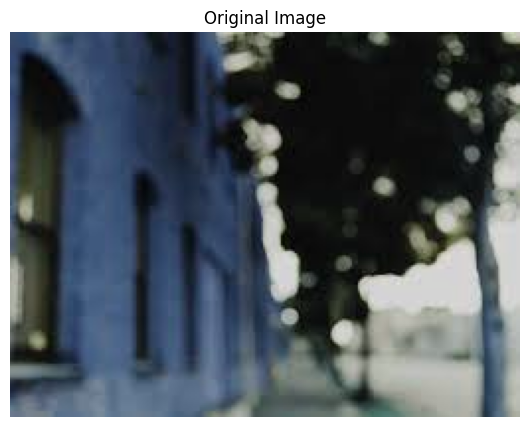

In [110]:
plt.subplots(1,1, figsize=(15,5))
plt.imshow(original, cmap='gray')
plt.axis('off')
plt.title("Original Image")
plt.show()

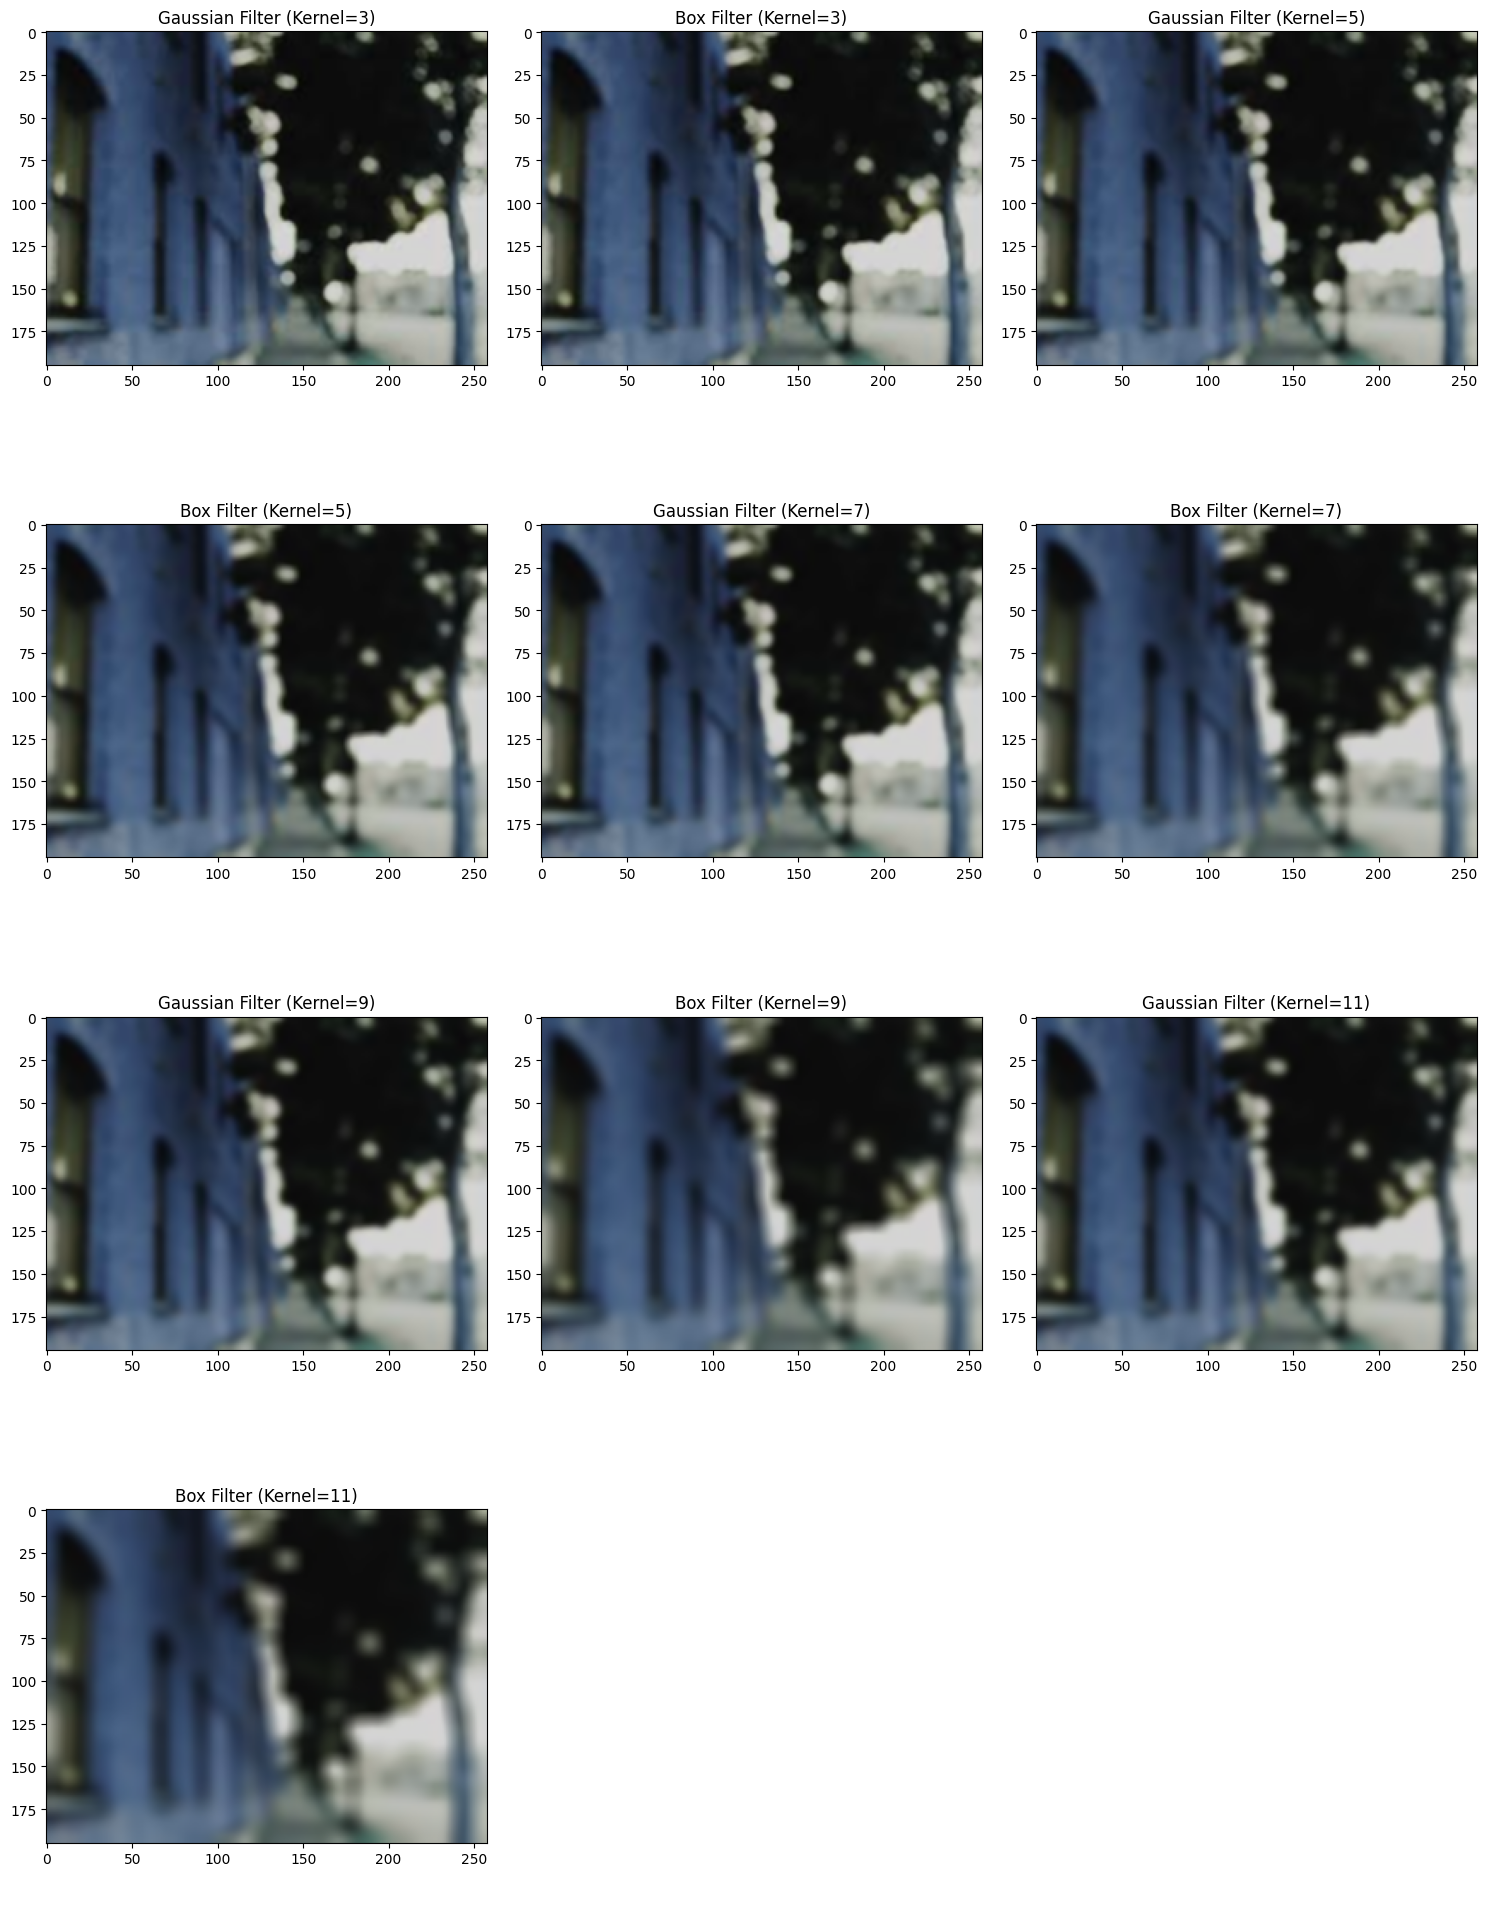

In [111]:
num_images = len(df)
num_cols = 3
num_rows = int(np.ceil(num_images / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.ravel()

for i in range(num_images):
    image_data = df.iloc[i]['image']
    kernel_size = df.iloc[i]['Kernel Size']
    filter_type = df.iloc[i]['Filter Type']

    axes[i].imshow(image_data, cmap='gray')
    axes[i].set_title(f'{filter_type} Filter (Kernel={kernel_size})')

for i in range(num_images, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

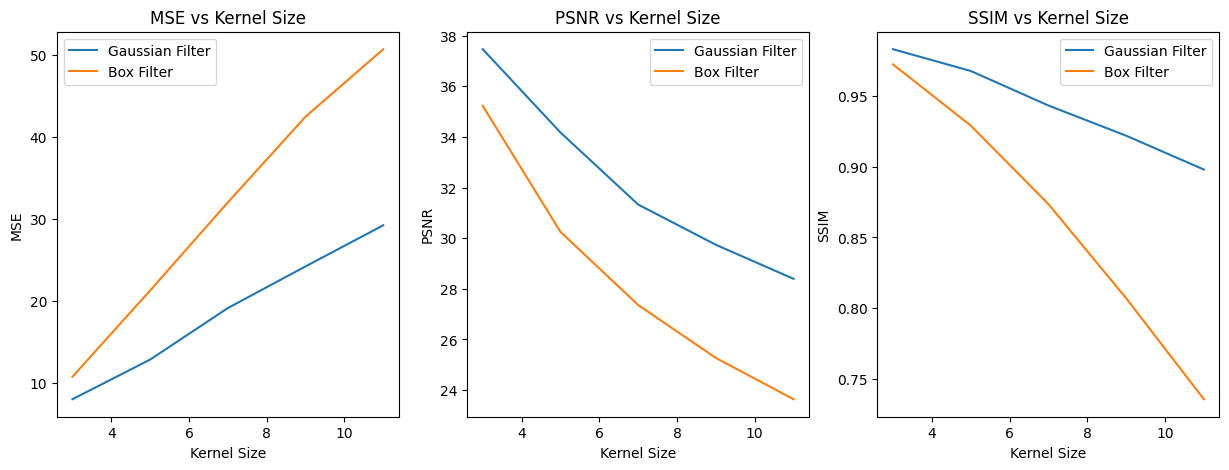


Optimal Kernel Sizes:
   Kernel Size Filter Type        MSE       PSNR      SSIM
9           11         Box  50.688425  23.637371  0.735670
7            9         Box  42.474014  25.269000  0.807028
5            7         Box  32.027635  27.360029  0.873514
8           11    Gaussian  29.236958  28.394072  0.898011
6            9    Gaussian  24.230491  29.739514  0.921921


In [112]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for filter_type in ['Gaussian', 'Box']:
    subset = df[df['Filter Type'] == filter_type]
    axes[0].plot(subset['Kernel Size'], subset['MSE'], label=f'{filter_type} Filter')
    axes[1].plot(subset['Kernel Size'], subset['PSNR'], label=f'{filter_type} Filter')
    axes[2].plot(subset['Kernel Size'], subset['SSIM'], label=f'{filter_type} Filter')

axes[0].set_title('MSE vs Kernel Size')
axes[0].set_xlabel('Kernel Size')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].set_title('PSNR vs Kernel Size')
axes[1].set_xlabel('Kernel Size')
axes[1].set_ylabel('PSNR')
axes[1].legend()

axes[2].set_title('SSIM vs Kernel Size')
axes[2].set_xlabel('Kernel Size')
axes[2].set_ylabel('SSIM')
axes[2].legend()

plt.show()

print("\nOptimal Kernel Sizes:")
print((df.drop("image", axis="columns")).sort_values(by=['MSE','SSIM', 'PSNR'], ascending=False).head())

# Question 2 - Hybrid Filtering for Salt-and-Pepper Noise Removal
Combine median filtering and low-pass filters to denoise an image affected by salt-and-pepper noise.

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [114]:
original = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

In [115]:
noisy_image = original.copy()
num_salt = int(0.05 * original.size * 0.5)
num_pepper = int(0.05 * original.size * 0.5)

coords = [np.random.randint(0, i - 1, num_salt) for i in original.shape]
noisy_image[coords[0], coords[1]] = 255

coords = [np.random.randint(0, i - 1, num_pepper) for i in original.shape]
noisy_image[coords[0], coords[1]] = 0

In [116]:
def apply_filter(image, kernel_size, filter):
  if filter == 'median':
    return cv2.medianBlur(image, kernel_size)
  elif filter == 'gaussian':
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [117]:
def calculate_psnr(original, denoised):
    return cv2.PSNR(original, denoised)

In [118]:
median_filtered = apply_filter(noisy_image, 3, 'median')

In [119]:
hybrid_filtered = apply_filter(median_filtered, 5, 'gaussian')

In [120]:
psnr_noisy = calculate_psnr(original, noisy_image)
psnr_median = calculate_psnr(original, median_filtered)
psnr_hybrid = calculate_psnr(original, hybrid_filtered)

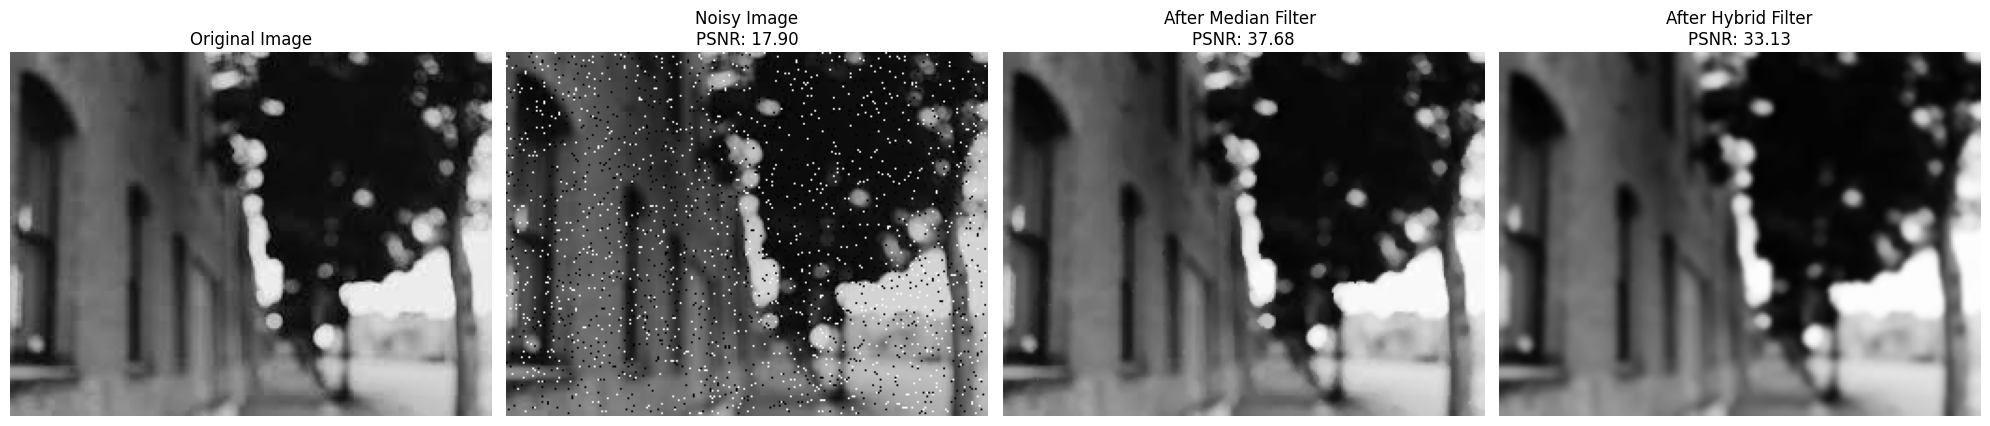

In [121]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(original, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title(f'Noisy Image\nPSNR: {psnr_noisy:.2f}')
axes[2].imshow(median_filtered, cmap='gray')
axes[2].set_title(f'After Median Filter \nPSNR: {psnr_median:.2f}')
axes[3].imshow(hybrid_filtered, cmap='gray')
axes[3].set_title(f'After Hybrid Filter\nPSNR: {psnr_hybrid:.2f}')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Question 3 - Comparison of Box Filter and Gaussian Filter in Real-Time Video Processing
Use Box and Gaussian filters to process frames of a video in real-time.

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def apply_filter(image, kernel_size, filter):
  if filter == 'gaussian':
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
  elif filter == 'box':
    return cv2.blur(image, (kernel_size, kernel_size))

In [124]:
def calculate_psnr(original, denoised):
    return cv2.PSNR(original, denoised)

In [126]:
cap = cv2.VideoCapture('video.mp4')
frame_count = 0

while True:
  ret, frame = cap.read()
  if not ret:
    print("End of video or unable to read frame.")
    break

  frame_count += 1
  if (frame_count % 24 == 0):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Box filter
    box_filtered = apply_filter(gray_frame, kernel_size=11, filter='box')

    gaussian_filtered = apply_filter(gray_frame, kernel_size=11, filter='gaussian')

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(gray_frame, cmap='gray')
    axes[0].set_title('Original')
    axes[1].imshow(box_filtered, cmap='gray')
    axes[1].set_title(f'Box Filter \nPSNR: {calculate_psnr(gray_frame, box_filtered)}')
    axes[2].imshow(gaussian_filtered, cmap='gray')
    axes[2].set_title(f'Gaussian Filter \nPSNR: {calculate_psnr(gray_frame, gaussian_filtered)}')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

cap.release()
plt.close()

Output hidden; open in https://colab.research.google.com to view.